In [1]:
import os
import glob
import h5py
import numpy as np
import pandas as pd
from astropy.wcs import WCS
import astropy.io.fits as pf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

['negative', 'positive']
['25861U', '43910U']


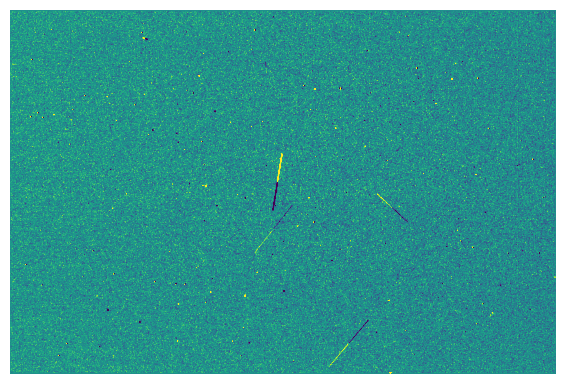

In [ ]:
known  = pd.read_pickle('../coords/SkyPos_48506377LSC/known_satellites20221023LSC.p')
pxlpos = pd.read_pickle('../coords/SkyPos_48506377LSC/pixel_position_known_satellites20221023LSC.p')

print(list(known))
print(list(known['positive']))
        
plt.figure(figsize=[6,4])
data = pf.getdata('../coords/diff_48506377LSC.fits.gz') 
plt.imshow(data, vmin=-20, vmax=20, cmap='viridis') #viridis
plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
# YUNHAI 2 2
satnum = list(known['positive'])[1]
JD_pos = list(pxlpos['positive'][satnum])[0]
JD_neg = list(pxlpos['negative'][satnum])[0]

In [4]:
plt.figure(figsize=[6,4])
data, header = pf.getdata('../coords/diff_48506377LSC.fits.gz', header=True) 
imgwcs = WCS(header=header)
ax = plt.subplot(projection=imgwcs)
im = ax.imshow(data, vmin=-15, vmax=10)

satnum1 = list(known['positive'])[0]
x1 = pxlpos['positive'][satnum1][JD_pos]['end'][0]
y1 = pxlpos['positive'][satnum1][JD_pos]['end'][1]
xx0 = pxlpos['negative'][satnum1][JD_neg]['start'][0]
yy0 = pxlpos['negative'][satnum1][JD_neg]['start'][1]

c = Circle((x1,y1), radius=30, fill=False, color='r')
ax.add_patch(c)
c = Circle((xx0,yy0), radius=30, fill=False, color='r')
ax.add_patch(c)

x0 = pxlpos['positive'][satnum][JD_pos]['start'][0]
y0 = pxlpos['positive'][satnum][JD_pos]['start'][1]
x1 = pxlpos['positive'][satnum][JD_pos]['end'][0]
y1 = pxlpos['positive'][satnum][JD_pos]['end'][1]

xx0 = pxlpos['negative'][satnum][JD_neg]['start'][0]
yy0 = pxlpos['negative'][satnum][JD_neg]['start'][1]
xx1 = pxlpos['negative'][satnum][JD_neg]['end'][0]
yy1 = pxlpos['negative'][satnum][JD_neg]['end'][1]

# P = 100
# r = Rectangle((x0-P/2, y0-P/2), P, P, edgecolor='red', facecolor='none')
# ax.add_patch(r)
# plt.plot([x0,x1], [y0,y1])

center = x1, y1
c = Circle(center, radius=30, fill=False, color='r')
ax.add_patch(c)

center = xx0, yy0
c = Circle(center, radius=30, fill=False, color='r')
ax.add_patch(c)

plt.axis('off')
plt.tight_layout()
# plt.savefig('skypositions.png', dpi=300, facecolor='w')
plt.show()

TypeError: WCSAxes.__init__() got multiple values for argument 'wcs'

<Figure size 600x400 with 0 Axes>

In [ ]:
print('Positive: ', x1, y1)
print('Negative: ', xx0, yy0)

In [ ]:
P = 500
(xmin, xmax), (ymin, ymax) = wcs.all_world2pix([x0-P, x1+P], [y0-P, y1+P], 0)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=15)
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
r = Rectangle((x0-P/2, y0-P/2), P, P, edgecolor='red', facecolor='none')
ax.add_patch(r)
plt.show()

In [ ]:
JD_pos = list(known['positive'][satnum])
JD_neg = list(known['negative'][satnum])

RA  = list(known['positive'][satnum][JD_pos[0]])[0][0]
dec = list(known['positive'][satnum][JD_pos[0]])[0][1]
lst = list(known['positive'][satnum][JD_pos[0]])[1]

In [ ]:
passed = pd.read_pickle('../test_data/passages/passed_satellites_20221023LSC.p')
passgs = pd.read_pickle('../test_data/passages/passages_20221023LSC.p')

In [ ]:
for i, sat in enumerate(list(passed)):
    if str(sat) == str(satnum):
        print(i)
        break

In [ ]:
passed[list(passed)[356]]

In [ ]:
midJD = header['midJD']
passgs[midJD][satnum]

In [ ]:
print(JD_pos[0], JD_pos[1])
print(passgs[midJD][satnum]['start']['jd'], passgs[midJD][satnum]['end']['jd'])

In [ ]:
print(passgs[midJD][satnum]['start']['ra'], passgs[midJD][satnum]['start']['dec'])
print(passgs[midJD][satnum]['end']['ra'], passgs[midJD][satnum]['end']['dec'])

## Skyfield vs Pyephem

In [ ]:
import ephem
from skyfield.api import load, wgs84, EarthSatellite 

In [ ]:
def search_tles(satellite):
    with open('../test_data/3leComplete.txt') as f:
        all_tles = f.readlines()
        f.close()   
        
    all_tles = [i.strip() for i in all_tles]
    tles = [all_tles[x:x+3] for x in range(0, len(all_tles), 3)]
    
    for i, tle in enumerate(tles):
        sat = tle[1][2:8]
        if satellite == sat:
            break    
            
    return tles[i]


def get_siteinfo():
    confdir = '../fotos-python3/bringfiles/siteinfo.dat'
    dtype = [('sitename', '|U20'), ('lat', 'float32'), ('lon', 'float32'), ('height', 'float32'), ('ID', '|U2')]
    siteinfo = np.genfromtxt(confdir, dtype=dtype)   
    mask = siteinfo['ID'] == 'LS'
    siteinfo = siteinfo[mask]
    return siteinfo


def j2000_to_equinox(ra, dec, jd):
    from astropy.time import Time
    from astropy.coordinates import SkyCoord, FK5
    t = Time(jd, scale='utc', format='jd') 
    t.format = 'jyear_str'
    gc = SkyCoord(ra, dec, frame='fk5', unit='deg', equinox='J2000')    
    gc = gc.transform_to(FK5(equinox=t))    
    return gc.ra.value, gc.dec.value

In [ ]:
satnum = list(known['positive'])[1]
tle = search_tles(satnum)
midJD  = header['midJD']
midLST = header['midLST']
site = get_siteinfo()

# Skyfield
ts = load.timescale()
sat_sky = EarthSatellite(tle[1], tle[2], tle[0], ts)
mascara = wgs84.latlon(latitude_degrees=site[0][1], longitude_degrees=site[0][2], elevation_m=site[0][3])
diff = sat_sky - mascara
topocentric = diff.at(ts.tt_jd(midJD))
ra, dec, radec_dist = topocentric.radec() 
ra_sky = ra._degrees
de_sky = dec._degrees

# Pyephem
sat_eph = ephem.readtle(tle[0], tle[1], tle[2])
obs = ephem.Observer()
obs.lat = site['lat']*np.pi/180
obs.long = site['lon']*np.pi/180
obs.elev = site['height']

edate = ephem.Date('2022/10/23 12:00:00.0')
obs.epoch = edate  
exptime = 6.382928100414574 
obs.date = midJD - 2415020-0.5*exptime/86400
sat_eph.compute(obs)

ra_eph = sat_eph.a_ra * (180/np.pi)
de_eph = sat_eph.a_dec * (180/np.pi)


print('In image:')
print(f"(Ra, Dec) = {passgs[midJD][satnum]['start']['ra']}, {passgs[midJD][satnum]['start']['dec']}")

print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")

print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")

### Converting (ra, dec) to pixel values to make sure they correspond to image

In [ ]:
def world2pix(lst, ra, dec, jd=None, nx=4008, ny=2672, margin=50):
    xwcs, ywcs = world2wcs(wcspars, ra, dec, lst, jd) # Compute wcs-only pixel coordinates
    mask = np.isfinite(xwcs) & clip_rectangle(xwcs, ywcs, nx, ny, margin) # Remove coordinates not within the margins
    xwcs, ywcs = xwcs[mask], ywcs[mask]        
    xpix, ypix = wcs2pix(polpars, xwcs, ywcs) # Convert to actual pixel coordinates.
    return xpix, ypix, mask


def clip_rectangle(x, y, nx, ny, margin):
    maskx = (x > margin) & (x < (nx - margin))
    masky = (y > margin) & (y < (ny - margin))
    return maskx & masky


def world2wcs(wcspars, ra, dec, lst=None, jd=None):
    """ Convert world coordinates to WCS-only coordinates. """    
    if jd is not None:
        ra, dec = j2000_to_equinox(ra, dec, jd)
    w = create_wcs(wcspars, lst)
    xwcs, ywcs = w.wcs_world2pix(ra, dec, 0)
    return xwcs, ywcs


def create_wcs(wcspars, lst=None):
    """ Create and astropy WCS instance from a dictionary of parameters. """  
    from astropy import wcs
    
    if lst is not None:
        ra0, dec0 = wcspars['crval']
        ha0 = ra2ha(ra0, wcspars['lst'])
        ra0 = ha2ra(ha0, lst)
        crval = np.array([ra0, dec0])   
    else:
        crval = wcspars['crval']
        
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = wcspars['crpix']
    w.wcs.cdelt = wcspars['cdelt']
    w.wcs.crval = crval
    w.wcs.ctype = ["RA---TAN", "DEC--TAN"]
    w.wcs.pc = wcspars['pc']
    return w


def ra2ha(ra, lst):
    """ Convert Right Ascension to Hour Angle. """
    ha = np.mod(lst*15. - ra, 360.)
    return ha

def ha2ra(ha, lst):
    """ Convert Hour Angle to Right Ascension. """    
    ra = np.mod(lst*15. - ha, 360.)
    return ra


def j2000_to_equinox(ra, dec, jd):
    from astropy.time import Time
    from astropy.coordinates import SkyCoord, FK5
    t = Time(jd, scale='utc', format='jd') 
    t.format = 'jyear_str'
    gc = SkyCoord(ra, dec, frame='fk5', unit='deg', equinox='J2000')    
    gc = gc.transform_to(FK5(equinox=t))    
    return gc.ra.value, gc.dec.value


def wcs2pix(polpars, xwcs, ywcs):
    """ Convert WCS-only coordinates to pixel coordinates. """     
    dx, dy = leg2d_eval(xwcs, ywcs, polpars['x_wcs2pix'], polpars['y_wcs2pix'], 
                        polpars['order'], polpars['nx'], polpars['ny'])    
    xpix, ypix = xwcs + dx, ywcs + dy
    return xpix, ypix


def leg2d_eval(x, y, a, b, order=6, nx=4008., ny=2672.):
    """ Evaluate 2-D polynomials. """
    mat, idx1, idx2 = leg2d_mat(x, y, order, nx, ny)
    xres = np.dot(mat, a[idx1, idx2])
    yres = np.dot(mat, b[idx1, idx2])
    return xres, yres  


def leg2d_mat(x, y, order=6, nx=4008., ny=2672.):
    """ Create a matrix for fitting 2-D polynomials of the given order. """ 
    from numpy.polynomial import legendre
    x = np.array(x)
    y = np.array(y)
    mat1 = legendre.legvander(2*(x/nx) - 1, order+1)
    mat2 = legendre.legvander(2*(y/ny) - 1, order+1)
        
    idx1, idx2 = np.indices((order+1, order+1))
    mask = ((idx1 + idx2) <= order)
    idx1, idx2 = idx1[mask], idx2[mask]        
        
    mat = mat1[:,idx1]*mat2[:,idx2]
    return mat, idx1, idx2

In [ ]:
def world_to_pix(ra, dec, midJD, lstseq='48506377'):
    
    fast  = h5py.File("../fast_20221023LSC.hdf5", "r")
    astro = np.where((fast['astrometry/lstseq'][:] // 50) == (int(lstseq) // 50))[0][0]
    order = fast['astrometry/x_wcs2pix'][astro].shape[0]-1
    lst = fast['station/lst'][np.where(fast['station/lstseq'][:] == (fast['astrometry/lstseq'][astro]))[0][0]]
    nx = header['XSIZE']
    ny = header['YSIZE']

    wcspars = { 'crval' : fast['astrometry/crval'][astro].copy(),
                'crpix' : fast['astrometry/crpix'][astro].copy(),
                'cdelt' : [0.02148591731740587,0.02148591731740587],
                'pc'    : fast['astrometry/pc'][astro].copy(),
                'lst'   : lst }

    polpars = { 'x_wcs2pix' : fast['astrometry/x_wcs2pix'][astro].copy(),
                'y_wcs2pix' : fast['astrometry/y_wcs2pix'][astro].copy(),
                'x_pix2wcs' : fast['astrometry/x_pix2wcs'][astro].copy(),
                'y_pix2wcs' : fast['astrometry/y_pix2wcs'][astro].copy(),
                'nx'    : nx,
                'ny'    : ny,
                'order' : order }

    ra, dec = j2000_to_equinox(ra, dec, midJD)
    w = create_wcs(wcspars, midLST)
    xwcs, ywcs = w.wcs_world2pix(ra, dec, 0)
    
    #mask = np.isfinite(xwcs) & clip_rectangle(xwcs, ywcs, nx, ny, margin=50) 
    #xwcs, ywcs = xwcs[mask], ywcs[mask]

    xpix, ypix = wcs2pix(polpars, xwcs, ywcs)
    fast.close()
    
    return xpix, ypix

In [ ]:
x_sky, y_sky = world_to_pix(ra_sky, de_sky, midJD)
x_eph, y_eph = world_to_pix(ra_eph, de_eph, midJD)

print(f'Skyfield world-to-pix: {x_sky}, {y_sky}')
print(f'Pyephem  world-to-pix: {x_eph}, {y_eph}')

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

# YUNHAI 2 2
satnum = list(known['positive'])[1]
JD_pos = list(pxlpos['positive'][satnum])[0]
JD_neg = list(pxlpos['negative'][satnum])[0]

x0 = pxlpos['positive'][satnum][JD_pos]['start'][0]
y0 = pxlpos['positive'][satnum][JD_pos]['start'][1]
x1 = pxlpos['positive'][satnum][JD_pos]['end'][0]
y1 = pxlpos['positive'][satnum][JD_pos]['end'][1]

xx0 = pxlpos['negative'][satnum][JD_neg]['start'][0]
yy0 = pxlpos['negative'][satnum][JD_neg]['start'][1]
xx1 = pxlpos['negative'][satnum][JD_neg]['end'][0]
yy1 = pxlpos['negative'][satnum][JD_neg]['end'][1]

# center = x1, y1
# c = Circle(center, radius=30, fill=False, color='r')
# ax.add_patch(c)

# center = xx0, yy0
# c = Circle(center, radius=30, fill=False, color='r')
# ax.add_patch(c)

# center = x_sky, y_sky
# c = Circle(center, radius=30, fill=False, color='r')
# ax.add_patch(c)

center = x_eph, y_eph
c = Circle(center, radius=30, fill=False, color='r')
ax.add_patch(c)

# center = 36, 25
# c = Circle(center, radius=30, fill=False, color='r')
# ax.add_patch(c)

center = 3258.2601370008856, 1863.1203399614328
c = Circle(center, radius=30, fill=False, color='b')
ax.add_patch(c)

center = 3145.4140557188925, 1759.7427754948267
c = Circle(center, radius=30, fill=False, color='w')
ax.add_patch(c)



plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def pix_to_world(X, Y, midJD, lstseq='48506377'):
    
    def pix2world(lst, xpix, ypix, jd):
        xwcs, ywcs = pix2wcs(polpars, xpix, ypix)
        ra, dec = wcs2world(wcspars, xwcs, ywcs, lst, jd)
        return ra, dec

    def pix2wcs(polpars, xpix, ypix):
        dx, dy = leg2d_eval(xpix, ypix, polpars['x_pix2wcs'], polpars['y_pix2wcs'], polpars['order'], polpars['nx'], polpars['ny']) 
        xwcs, ywcs = xpix + dx, ypix + dy 
        return xwcs, ywcs

    def wcs2world(wcspars, xwcs, ywcs, lst=None, jd=None):
        w = create_wcs(wcspars, lst)
        ra, dec = w.wcs_pix2world(xwcs, ywcs, 0)
        if jd is not None:
            ra, dec = equinox_to_j2000(ra, dec, jd)
        return ra, dec  

    def equinox_to_j2000(ra, dec, jd):
        from astropy.time import Time
        from astropy.coordinates import SkyCoord, FK5    
        t = Time(jd, scale='utc', format='jd')
        t.format = 'jyear_str'
        gc = SkyCoord(ra, dec, frame='fk5', unit='deg', equinox=t)    
        gc = gc.transform_to(FK5(equinox='J2000')) 
        return gc.ra.value, gc.dec.value
    
    fast  = h5py.File("../fast_20221023LSC.hdf5", "r")
    astro = np.where((fast['astrometry/lstseq'][:] // 50) == (int(lstseq) // 50))[0][0]
    order = fast['astrometry/x_wcs2pix'][astro].shape[0]-1
    lst = fast['station/lst'][np.where(fast['station/lstseq'][:] == (fast['astrometry/lstseq'][astro]))[0][0]]
    nx = header['XSIZE']
    ny = header['YSIZE']

    wcspars = { 'crval' : fast['astrometry/crval'][astro].copy(),
                'crpix' : fast['astrometry/crpix'][astro].copy(),
                'cdelt' : [0.02148591731740587,0.02148591731740587],
                'pc'    : fast['astrometry/pc'][astro].copy(),
                'lst'   : lst }

    polpars = { 'x_wcs2pix' : fast['astrometry/x_wcs2pix'][astro].copy(),
                'y_wcs2pix' : fast['astrometry/y_wcs2pix'][astro].copy(),
                'x_pix2wcs' : fast['astrometry/x_pix2wcs'][astro].copy(),
                'y_pix2wcs' : fast['astrometry/y_pix2wcs'][astro].copy(),
                'nx'    : nx,
                'ny'    : ny,
                'order' : order }
    
    ra, dec = pix2world(midLST, X, Y, jd=midJD)
    fast.close()
    
    return ra[0], dec[0]

In [ ]:
JD_pos = list(pxlpos['positive'][satnum])[0]
JD_neg = list(pxlpos['negative'][satnum])[0]
x1 = pxlpos['positive'][satnum][JD_pos]['end'][0]
y1 = pxlpos['positive'][satnum][JD_pos]['end'][1]

ra, dec = pix_to_world(x1, y1, midJD)
print(x1, y1)
print(ra, dec)

# THIS IS CORRECT

In [ ]:
JD_pos_ = list(known['positive'][satnum])
JD_neg_ = list(known['negative'][satnum])

RA  = list(known['positive'][satnum][JD_pos_[0]])[0][0]
DEC = list(known['positive'][satnum][JD_pos_[0]])[0][1]
LST = list(known['positive'][satnum][JD_pos_[0]])[1]

print(RA, DEC, LST)

In [ ]:
X1 = pxlpos['positive'][satnum][2459876.524729224]['end'][0]
Y1 = pxlpos['positive'][satnum][2459876.524729224]['end'][1]

ra, dec = pix_to_world(X1, X1, midJD)
print(X1, X1)
print(ra, dec)

In [ ]:
known['positive'][satnum]

In [ ]:
# OKAY --> we will use this RA and DEC (since we know to be correct)

x = pxlpos['positive'][satnum][JD_pos]['end'][0]
y = pxlpos['positive'][satnum][JD_pos]['end'][1]

ra, dec = pix_to_world(x, y, midJD)
print(x, y)
print(ra, dec)

print('\nIn image:')
print(f"(Ra, Dec) = {passgs[midJD][satnum]['start']['ra']}, {passgs[midJD][satnum]['start']['dec']}")

print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")

print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")

In [ ]:
passgs[midJD][satnum]

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

center = passgs[midJD][satnum]['start']['x0'], passgs[midJD][satnum]['start']['y0']
c = Circle(center, radius=30, fill=False, color='r')
ax.add_patch(c)

center = passgs[midJD][satnum]['end']['x0'], passgs[midJD][satnum]['end']['y0']
c = Circle(center, radius=30, fill=False, color='b')
ax.add_patch(c)

plt.axis('off')
plt.tight_layout()
plt.show()

# Why does the coords in the Passages file differ from those in the pixel_positions_known_satellites ??

In [ ]:
print(ts.tt_jd(midJD).utc_strftime())

print('\nNegative:')
print(ts.tt_jd(2459876.5246184147).utc_strftime())
print(ts.tt_jd(2459876.524692291).utc_strftime())

print('\nPositive:')
print(ts.tt_jd(2459876.5246922914).utc_strftime())
print(ts.tt_jd(2459876.5247661564).utc_strftime())

In [ ]:
known['positive'][satnum]['pixelpositions']

In [ ]:
pxlpos['positive'][satnum]

In [ ]:
print(ts.tt_jd(2459876.524729224).utc_strftime())

### Position difference between Passages and Known files doesn't take away from the fact that skyfield and pyephem give different results - focus on this for now

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

print('In image:')
print(f"(Ra, Dec) = {passgs[midJD][satnum]['start']['ra']}, {passgs[midJD][satnum]['start']['dec']}")
print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")
print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")

x, y = world_to_pix(ra_sky, de_sky, midJD)
center = x, y
c = Circle(center, radius=30, fill=False, color='m', label='Sky')
ax.add_patch(c)

x, y = world_to_pix(ra_eph, de_eph, midJD)
center = x, y
c = Circle(center, radius=30, fill=False, color='b', label='Eph')
ax.add_patch(c)

x, y = world_to_pix(passgs[midJD][satnum]['start']['ra'], passgs[midJD][satnum]['start']['dec'], midJD)
center = x, y
c = Circle(center, radius=30, fill=False, color='w', label='Psg - (ra,dec)')
ax.add_patch(c)

center = passgs[midJD][satnum]['start']['x0'], passgs[midJD][satnum]['start']['y0']
c = Circle(center, radius=30, fill=False, color='r', linestyle=':', label='Psg - (x,y)')
ax.add_patch(c)

plt.legend(loc=3)


plt.axis('off')
plt.tight_layout()
plt.show()

### Why is Skyfield so different?

In [ ]:
satnum = list(known['positive'])[1]
tle = search_tles(satnum)
midJD  = header['midJD']
midLST = header['midLST']
site = get_siteinfo()

ts = load.timescale()
sat_sky = EarthSatellite(tle[1], tle[2], tle[0], ts)
mascara = wgs84.latlon(latitude_degrees=site[0][1], longitude_degrees=site[0][2], elevation_m=site[0][3])

diff = sat_sky - mascara
topocentric = diff.at(ts.tt_jd(midJD))
ra, dec, radec_dist = topocentric.radec() 
ra_sky = ra._degrees
de_sky = dec._degrees


print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")

print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")

In [ ]:
obs = ephem.Observer()
obs.lat = site['lat']*np.pi/180
obs.long = site['lon']*np.pi/180
obs.elev = site['height']
edate = ephem.Date('2022/10/23 12:00:00.0')
obs.epoch = edate  
exptime = 6.382928100414574 
obs.date = midJD - 2415020-0.5*exptime/86400 #number of days since 1899 December 31 12:00 UT

# sat_eph.compute(obs)
# ra_eph = sat_eph.a_ra * (180/np.pi)
# de_eph = sat_eph.a_dec * (180/np.pi)

In [ ]:
print(str(obs.date))
print(ts.tt_jd(midJD).utc_strftime())

In [ ]:
from pytz import timezone
chile = timezone('Chile/Continental')
test = chile.localize(obs.date.datetime())
t = ts.from_datetime(test)

print(ts.tt_jd(t.tt).utc_strftime()) #hmmmm

#### Are my times wrong?

In [ ]:
from astropy.time import Time
t = Time(midJD, format='jd')
print(t.iso)
# This is closer to what Pyephem does!

print(t.value)
print(midJD)

In [ ]:
print(ts.tt_jd(midJD).utc_strftime())
print(ts.tai_jd(midJD).utc_strftime())
print(ts.tdb_jd(midJD).utc_strftime())
print(ts.from_astropy(t).utc_strftime())
print(str(obs.date))

In [ ]:
topocentric = diff.at(ts.from_astropy(t))
ra, dec, radec_dist = topocentric.radec() 
ra_sky = ra._degrees
de_sky = dec._degrees


print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")

print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

print('In image:')
print(f"(Ra, Dec) = {passgs[midJD][satnum]['start']['ra']}, {passgs[midJD][satnum]['start']['dec']}")
print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")
print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")

x, y = world_to_pix(ra_sky, de_sky, midJD)
center = x, y
c = Circle(center, radius=30, fill=False, color='m', label='Sky')
ax.add_patch(c)

x, y = world_to_pix(ra_eph, de_eph, midJD)
center = x, y
c = Circle(center, radius=30, fill=False, color='b', label='Eph')
ax.add_patch(c)

x, y = world_to_pix(passgs[midJD][satnum]['start']['ra'], passgs[midJD][satnum]['start']['dec'], midJD)
center = x, y
c = Circle(center, radius=30, fill=False, color='w', label='Psg - (ra,dec)')
ax.add_patch(c)

center = passgs[midJD][satnum]['start']['x0'], passgs[midJD][satnum]['start']['y0']
c = Circle(center, radius=30, fill=False, color='r', linestyle=':', label='Psg - (x,y)')
ax.add_patch(c)

plt.legend(loc=3)


plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# MUCH BETTER

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

JD_pos = list(pxlpos['positive'][satnum])[0]
JD_neg = list(pxlpos['negative'][satnum])[0]

x0 = pxlpos['positive'][satnum][JD_pos]['start'][0]
y0 = pxlpos['positive'][satnum][JD_pos]['start'][1]
x1 = pxlpos['positive'][satnum][JD_pos]['end'][0]
y1 = pxlpos['positive'][satnum][JD_pos]['end'][1]

xx0 = pxlpos['negative'][satnum][JD_neg]['start'][0]
yy0 = pxlpos['negative'][satnum][JD_neg]['start'][1]
xx1 = pxlpos['negative'][satnum][JD_neg]['end'][0]
yy1 = pxlpos['negative'][satnum][JD_neg]['end'][1]

P = 100
r = Rectangle((x0-P/2, y0-P/2), P, P, edgecolor='r', linestyle='--', facecolor='none', label='start - pos')
ax.add_patch(r)

r = Rectangle((x1-P/2, y1-P/2), P, P, edgecolor='w', linestyle='--', facecolor='none', label='end - pos')
ax.add_patch(r)

center = xx0, yy0
c = Circle(center, radius=30, fill=False, color='r', label='start - neg')
ax.add_patch(c)

center = xx1, yy1
c = Circle(center, radius=30, fill=False, color='w', label='end - neg')
ax.add_patch(c)


x, y = world_to_pix(ra_sky, de_sky, midJD)
c = Circle([x, y], radius=30, fill=False, color='m', label='Sky')
ax.add_patch(c)

x, y = world_to_pix(ra_eph, de_eph, midJD)
c = Circle([x,y], radius=30, fill=False, color='b', label='Eph')
ax.add_patch(c)

x, y = world_to_pix(passgs[midJD][satnum]['start']['ra'], passgs[midJD][satnum]['start']['dec'], midJD)
c = Circle([x,y], radius=30, fill=False, color='k', label='Psg - (ra,dec)')
ax.add_patch(c)

center = passgs[midJD][satnum]['start']['x0'], passgs[midJD][satnum]['start']['y0']
c = Circle(center, radius=30, fill=False, color='r', linestyle=':', label='Psg - (x,y)')
ax.add_patch(c)

plt.legend(loc=3)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)


x0 = known['negative'][satnum]['pixelpositions'][2459876.5246184147]['FOTOS'][0]
y0 = known['negative'][satnum]['pixelpositions'][2459876.5246184147]['FOTOS'][1]

xx0 = known['negative'][satnum]['pixelpositions'][2459876.524692291]['FOTOS'][0]
yy0 = known['negative'][satnum]['pixelpositions'][2459876.524692291]['FOTOS'][1]

x1 = known['positive'][satnum]['pixelpositions'][2459876.5246922914]['FOTOS'][0]
y1 = known['positive'][satnum]['pixelpositions'][2459876.5246922914]['FOTOS'][1]

xx1 = known['positive'][satnum]['pixelpositions'][2459876.5247661564]['FOTOS'][0]
yy1 = known['positive'][satnum]['pixelpositions'][2459876.5247661564]['FOTOS'][1]

P = 100
r = Rectangle((x0-P/2, y0-P/2), P, P, edgecolor='r', linestyle='--', facecolor='none', label='neg: jd0')
ax.add_patch(r)

r = Rectangle((xx0-P/2, yy0-P/2), P, P, edgecolor='w', linestyle='--', facecolor='none', label='neg: jd1')
ax.add_patch(r)

center = x1, y1
c = Circle(center, radius=30, fill=False, color='r', label='pos: jd0')
ax.add_patch(c)

center = xx1, yy1
c = Circle(center, radius=30, fill=False, color='w', label='pos: jd1')
ax.add_patch(c)

plt.legend(loc=3)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
pxlpos['negative'][satnum]

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

plt.axis('off')
plt.tight_layout()
# plt.savefig('diff_img.png', dpi=150, facecolor='w')
plt.show()

In [ ]:
passgs[midJD][satnum]

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

satnum1 = list(known['positive'])[0]
x1 = pxlpos['positive'][satnum1][JD_pos]['end'][0]
y1 = pxlpos['positive'][satnum1][JD_pos]['end'][1]
xx0 = pxlpos['negative'][satnum1][JD_neg]['start'][0]
yy0 = pxlpos['negative'][satnum1][JD_neg]['start'][1]

c = Circle((x1,y1), radius=30, fill=False, color='r')
ax.add_patch(c)
c = Circle((xx0,yy0), radius=30, fill=False, color='r')
ax.add_patch(c)

satnum = list(known['positive'])[1]
x1 = pxlpos['positive'][satnum][JD_pos]['end'][0]
y1 = pxlpos['positive'][satnum][JD_pos]['end'][1]
xx0 = pxlpos['negative'][satnum][JD_neg]['start'][0]
yy0 = pxlpos['negative'][satnum][JD_neg]['start'][1]

c = Circle((x1,y1), radius=30, fill=False, color='r')
ax.add_patch(c)
c = Circle((xx0,yy0), radius=30, fill=False, color='r')
ax.add_patch(c)

plt.axis('off')
plt.tight_layout()
# plt.savefig('skypositions.png', dpi=150, facecolor='w')
plt.show()

In [ ]:
## SHOWS HOW THE DIFFERENCE IMAGE COORDS DIFFER TO THOSE FROM PRODUCESKYPOSITIONS

plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)


center = passgs[midJD][satnum]['start']['x0'], passgs[midJD][satnum]['start']['y0']
c = Circle(center, radius=30, fill=False, color='w', linestyle='-')
ax.add_patch(c)

center = passgs[midJD][satnum]['end']['x0'], passgs[midJD][satnum]['end']['y0']
c = Circle(center, radius=30, fill=False, color='w', linestyle='-', label='Difference image')
ax.add_patch(c)


JD_pos = list(pxlpos['positive'][satnum])[0]
JD_neg = list(pxlpos['negative'][satnum])[0]
xx0 = pxlpos['negative'][satnum][JD_neg]['start'][0]
yy0 = pxlpos['negative'][satnum][JD_neg]['start'][1]
xx1 = pxlpos['negative'][satnum][JD_neg]['end'][0]
yy1 = pxlpos['negative'][satnum][JD_neg]['end'][1]

c = Circle((xx0, yy0), radius=30, fill=False, color='r', label='Determined track position')
ax.add_patch(c)

c = Circle((xx1, yy1), radius=30, fill=False, color='r')
ax.add_patch(c)


plt.legend(loc=3, framealpha=0.5)
plt.axis('off')
plt.tight_layout()
# plt.savefig('diff_vs_skypos.png', dpi=150, facecolor='w')
plt.show()

In [ ]:
satnum = list(known['positive'])[1]
tle = search_tles(satnum)
midJD  = header['midJD']
midLST = header['midLST']
site = get_siteinfo()

# Skyfield
ts = load.timescale()
sat_sky = EarthSatellite(tle[1], tle[2], tle[0], ts)
mascara = wgs84.latlon(latitude_degrees=site[0][1], longitude_degrees=site[0][2], elevation_m=site[0][3])
diff = sat_sky - mascara
topocentric = diff.at(ts.tt_jd(midJD))
ra, dec, radec_dist = topocentric.radec() 
ra_sky = ra._degrees
de_sky = dec._degrees

# Pyephem
sat_eph = ephem.readtle(tle[0], tle[1], tle[2])
obs = ephem.Observer()
obs.lat = site['lat']*np.pi/180
obs.long = site['lon']*np.pi/180
obs.elev = site['height']

edate = ephem.Date('2022/10/23 12:00:00.0')
obs.epoch = edate  
exptime = 6.382928100414574 
obs.date = midJD - 2415020-0.5*exptime/86400
sat_eph.compute(obs)

ra_eph = sat_eph.a_ra * (180/np.pi)
de_eph = sat_eph.a_dec * (180/np.pi)


print('In image:')
print(f"(Ra, Dec) = {passgs[midJD][satnum]['start']['ra']}, {passgs[midJD][satnum]['start']['dec']}")

print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")

print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")


plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

x, y = world_to_pix(ra_sky, de_sky, midJD)
c = Circle([x, y], radius=30, fill=False, color='m', label='Skyfield')
ax.add_patch(c)

x, y = world_to_pix(ra_eph, de_eph, midJD)
c = Circle([x,y], radius=30, fill=False, color='w', label='PyEphem')
ax.add_patch(c)

center = passgs[midJD][satnum]['start']['x0'], passgs[midJD][satnum]['start']['y0']
c = Circle(center, radius=30, fill=False, color='r', linestyle=':', label='Difference image')
ax.add_patch(c)

plt.legend(loc=3)
plt.axis('off')
plt.tight_layout()
# plt.savefig('skyfield_incorrect.png', dpi=150, facecolor='w')
plt.show()

In [ ]:
topocentric = diff.at(ts.from_astropy(t))
ra, dec, radec_dist = topocentric.radec() 
ra_sky = ra._degrees
de_sky = dec._degrees

print('\nSkyfield:')
print(f"(Ra, Dec) = {ra_sky}, {de_sky}\n")

print('Pyephem:')
print(f"(Ra, Dec) = {ra_eph}, {de_eph}")


plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

x, y = world_to_pix(ra_sky, de_sky, midJD)
c = Circle([x, y], radius=30, fill=False, color='m', label='Skyfield')
ax.add_patch(c)

x, y = world_to_pix(ra_eph, de_eph, midJD)
c = Circle([x,y], radius=30, fill=False, color='w', label='PyEphem')
ax.add_patch(c)

center = passgs[midJD][satnum]['start']['x0'], passgs[midJD][satnum]['start']['y0']
c = Circle(center, radius=30, fill=False, color='r', linestyle=':', label='Difference image')
ax.add_patch(c)

plt.legend(loc=3)
plt.axis('off')
plt.tight_layout()
# plt.savefig('skyfield_correct.png', dpi=150, facecolor='w')
plt.show()

In [ ]:
with open('../test_data/3leComplete.txt') as f:
    all_tles = f.readlines()
    f.close()   

all_tles = [i.strip() for i in all_tles]
tles = [all_tles[x:x+3] for x in range(0, len(all_tles), 3)]
starlink_tles = []
for tle in tles:
    if "STARLINK" in tle[0]:
        starlink_tles.append(tle)
        

passed_sats = pd.read_pickle(f'../test_data/passages/passed_satellites_20221023LSC.p')
keys = list(passed_sats)

idx = []
starlinks = np.asarray(starlink_tles).flatten()
for key in keys:
    mascara_tle1 = passed_sats[key]['TLE line1'].strip()
    i = np.where(starlinks == mascara_tle1)[0]
    if i.size > 0:
        idx.append(i[0] - 1) #appending the name of the starlink sat

# Now have indices for the flattened Starlink TLE list --> divide by 3 to get indices for the original list
orig_idx = [int(x/3) for x in idx]
slk_mas_tles = res_list = [starlink_tles[i] for i in orig_idx]

# Remove 0 labeling of first line of TLE because that's the proper format
for tle in slk_mas_tles:
    tle[0] = tle[0][2:]

In [ ]:
satnums = list(passgs[midJD])

In [ ]:
starlinks = []
for tle in slk_mas_tles:
    starlinks.append(tle[1][2:8])

In [ ]:
idx_reduced = []
for i, sat in enumerate(starlinks):
    if sat in satnums:
        idx = satnums.index(sat)
        idx_reduced.append(idx)

In [ ]:
for i in idx_reduced:
    print(satnums[i])

In [ ]:
passgs[midJD]['48366U']

In [ ]:
passgs[midJD]['51788U']

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

center = passgs[midJD]['48366U']['start']['x0'], passgs[midJD]['48366U']['start']['y0']
c = Circle(center, radius=30, fill=False, color='r')
ax.add_patch(c)
center = passgs[midJD]['48366U']['end']['x0'], passgs[midJD]['48366U']['end']['y0']
c = Circle(center, radius=30, fill=False, color='r', label='48366U')
ax.add_patch(c)

center = passgs[midJD]['51788U']['start']['x0'], passgs[midJD]['51788U']['start']['y0']
c = Circle(center, radius=30, fill=False, color='w')
ax.add_patch(c)
center = passgs[midJD]['51788U']['end']['x0'], passgs[midJD]['51788U']['end']['y0']
c = Circle(center, radius=30, fill=False, color='w', label='51788U')
ax.add_patch(c)


plt.axis('off')
plt.legend(loc=3, framealpha=0.5)
plt.tight_layout()
# plt.savefig('starlinks_in_diff.png', dpi=150, facecolor='w')
plt.show()

06/04/23

In [ ]:
plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

center = passgs[midJD]['48366U']['start']['x0'], passgs[midJD]['48366U']['start']['y0']
c = Circle(center, radius=30, fill=False, color='r')
ax.add_patch(c)
center = passgs[midJD]['48366U']['end']['x0'], passgs[midJD]['48366U']['end']['y0']
c = Circle(center, radius=30, fill=False, color='r', label='STARLINK-2631')
ax.add_patch(c)

center = passgs[midJD]['51788U']['start']['x0'], passgs[midJD]['51788U']['start']['y0']
c = Circle(center, radius=30, fill=False, color='w')
ax.add_patch(c)
center = passgs[midJD]['51788U']['end']['x0'], passgs[midJD]['51788U']['end']['y0']
c = Circle(center, radius=30, fill=False, color='w', label='STARLINK-3641')
ax.add_patch(c)

# STARLINK-2631  =  48366U
# STARLINK-3641  =  51788U

plt.axis('off')
plt.legend(loc=3, framealpha=0.5)
plt.tight_layout()
# plt.savefig('starlinks_in_diff.png', dpi=150, facecolor='w')
plt.show()

In [ ]:
# Check nearest JDs to the midJD (before and after midJD key in passages file)

sat1 = '48366U'
sat2 = '51788U'

keys = list(passgs)
idx = keys.index(midJD)

if idx > 0:
    before = keys[idx - 1]
if idx < len(keys) - 1:
    after = keys[idx + 1]
    
for sat in [sat1, sat2]:
    if (sat in passgs[before]) and (sat in passgs[after]):
        print(f'{sat} is in closest two JDs')

labels = []
for jd in [before, midJD, after]:
    t = Time(jd, format='jd')
    labels.append(t.iso[11:])
    print(t.iso[11:])

In [ ]:
%matplotlib qt

plt.figure(figsize=[6,4])
data, header = pf.getdata(f'../coords/diff_48506377LSC.fits.gz', header=True) 
wcs = WCS(header=header)
ax = plt.subplot(projection=wcs)
im = ax.imshow(data, vmin=-15, vmax=10)

colors = ['white', 'black', 'red']
for i, jd in enumerate([before, midJD, after]):

    center = passgs[jd]['48366U']['start']['x0'], passgs[midJD]['48366U']['start']['y0']
    c = Circle(center, radius=30, fill=False, color=colors[i])
    ax.add_patch(c)
    
    center = passgs[jd]['48366U']['end']['x0'], passgs[midJD]['48366U']['end']['y0']
    c = Circle(center, radius=30, fill=False, color=colors[i], label=labels[i])
    ax.add_patch(c)

    center = passgs[jd]['51788U']['start']['x0'], passgs[midJD]['51788U']['start']['y0']
    c = Circle(center, radius=30, fill=False, color=colors[i])
    ax.add_patch(c)

    center = passgs[jd]['51788U']['end']['x0'], passgs[midJD]['51788U']['end']['y0']
    c = Circle(center, radius=30, fill=False, color=colors[i])
    ax.add_patch(c)

# STARLINK-2631  =  48366U
# STARLINK-3641  =  51788U

plt.axis('off')
plt.legend(loc=3, framealpha=0.5)
plt.tight_layout()
# plt.savefig('starlinks_in_diff.png', dpi=150, facecolor='w')
plt.show()